In [16]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [3]:
# 데이터 로드
df = pd.read_csv('./Boston_house.csv')
df.head(3)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7


In [4]:
# 상관성이 있어보이는 몇개의 변수로 일단 test형 다중회귀분석을 돌려보자
X1 = df[['CRIM', 'RM', 'LSTAT']]
y = df[['Target']]

In [5]:
X1 = sm.add_constant(X1, has_constant='add')

In [6]:
model1 = sm.OLS(y, X1)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          1.01e-112
Time:                        05:19:18   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.4

In [7]:
# 더 많은 변수를 써서 분석해보자
X2 = df[['CRIM','RM','LSTAT','B','TAX','AGE','ZN','NOX','INDUS']]
y = df[['Target']]

In [8]:
X2 = sm.add_constant(X2, has_constant='add')

In [13]:
model2 = sm.OLS(y, X2)
results2 = model2.fit()
print(results2.summary())
# R-squred는 소폭 상승했으나 P-value가 유의미하지 않은 변수도 있으며 변수간 다중공선성 문제도 확인이 필요

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 24 Sep 2019   Prob (F-statistic):          5.76e-111
Time:                        05:22:52   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.0

In [12]:
# 첫번째 모델과 두번째 모델의 파라미터 비교
# 변수를 더 많이 넣고 돌린 두번째 모델에서 각 변수들의 설명력이 소폭 하락한 것을 볼 수 있음
results1.params

const   -2.562251
CRIM    -0.102941
RM       5.216955
LSTAT   -0.578486
dtype: float64

In [14]:
results2.params

const   -7.108827
CRIM    -0.045293
RM       5.092238
LSTAT   -0.565133
B        0.008974
TAX     -0.006025
AGE      0.023619
ZN       0.029377
NOX      3.483832
INDUS    0.029270
dtype: float64

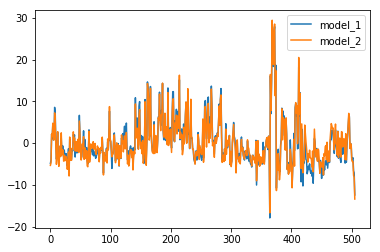

In [19]:
# 각 모델의 잔차 분포가 바뀌였는데 시각적으로 확인
results1.resid.plot(label='model_1')
results2.resid.plot(label='model_2')
plt.legend()
# 3개 변수를 쓴 모델1보다 더 많은 변수를 사용한 모델2에서 잔차가 소폭 감소한 것을 볼 수 있음